# Importando bibliotecas

In [ ]:
import pandas as pd
from keras.datasets import mnist
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras import models



# Acessando dataset e formatando dados

In [ ]:
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

In [ ]:
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_train = x_train.astype('float32') / 255
x_valid = x_valid.reshape((x_valid.shape[0], 28*28))
x_valid = x_valid.astype('float32') / 255

# Categorizando as labels

In [ ]:
y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)

# Printando shape para visualização

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
x_valid.shape

(10000, 784)

In [ ]:
y_valid.shape

(10000, 10)

# Visualizando os dados trabalhados

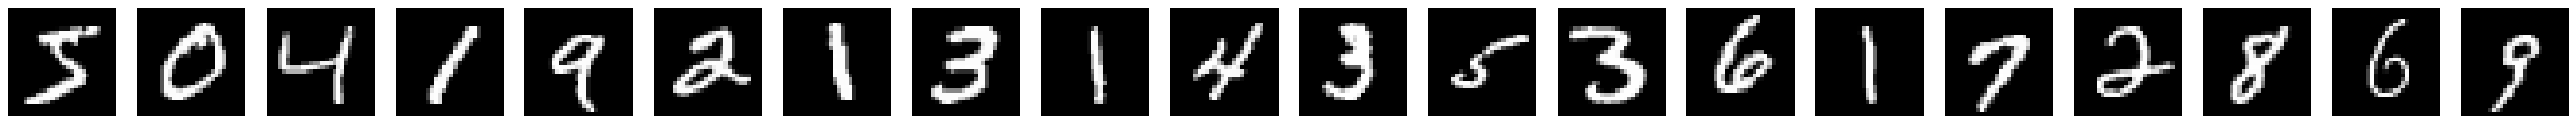

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images = 20
for i in range(num_images):
    row = x_train[i]
    label = y_train[i]

    image = row.reshape(28,28)
    plt.subplot(1, num_images, i+1)
    plt.axis('off')
    plt.imshow(image, cmap='gray')

# Verificando se está normalizado

In [ ]:
x_train.min()

0.0

In [ ]:
x_train.max()

1.0

In [ ]:
x_valid.min()

0.0

In [ ]:
x_valid.max()

1.0

In [ ]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
print(y_valid)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Construindo a rede neural

In [ ]:
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

#Compilando

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

#Treinando

In [ ]:
history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=20,
          verbose=1,
          validation_data=(x_valid, y_valid))

score = model.evaluate(x_valid, y_valid, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 11s 24ms/step - loss: 0.0231 - accuracy: 0.9930 - val_loss: 0.0775 - val_accuracy: 0.9859
Epoch 2/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0237 - accuracy: 0.9930 - val_loss: 0.0873 - val_accuracy: 0.9854
Epoch 3/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0241 - accuracy: 0.9926 - val_loss: 0.0861 - val_accuracy: 0.9858
Epoch 4/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0218 - accuracy: 0.9935 - val_loss: 0.0865 - val_accuracy: 0.9850
Epoch 5/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0236 - accuracy: 0.9933 - val_loss: 0.0895 - val_accuracy: 0.9851
Epoch 6/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0224 - accuracy: 0.9937 - val_loss: 0.0904 - val_accuracy: 0.9859
Epoch 7/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0245 - accuracy: 0.9933 - val_loss: 0.0879 - val_accuracy: 0

#Traçando gráficos de precisão e perda para visualização

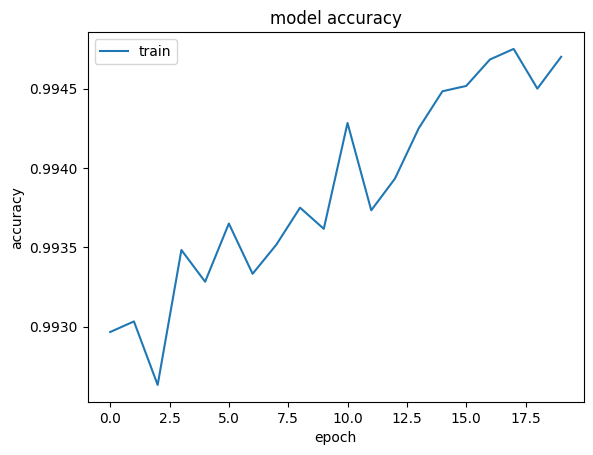

In [ ]:
plt.plot(history.history["accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper left")
plt.show()

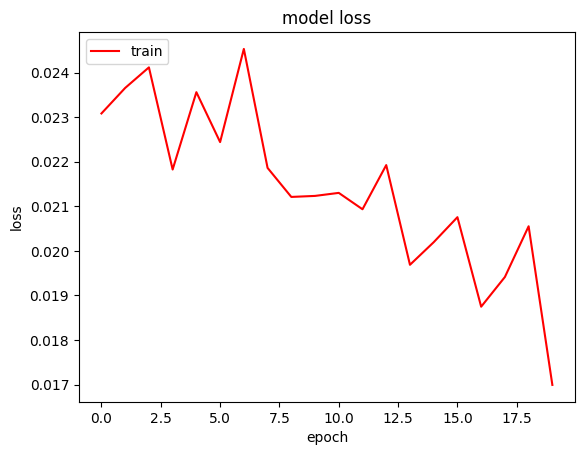

In [ ]:
plt.plot(history.history["loss"], "r-")
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper left")
plt.show()